## Pruebas autoencoder LSTM

https://machinelearningmastery.com/lstm-autoencoders/

### Reconstruction LSTM Autoencoder

In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [3]:
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(sequence.shape)
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
print(sequence.shape)

(9,)
(1, 9, 1)


In [4]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [5]:
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

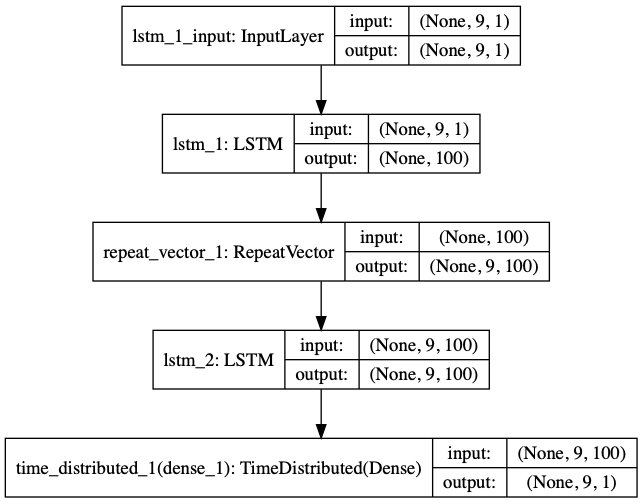

In [7]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')


In [8]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.10679437 0.20335032 0.30088562 0.3992175  0.4982357  0.59792465
 0.69836974 0.7997584  0.9023699 ]


### Prediction LSTM Autoencoder

In [9]:
# lstm autoencoder predict sequence
'''from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model'''

# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))

# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')

# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)

# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])

[0.16439945 0.28916416 0.40341553 0.5095924  0.6102969  0.7066845
 0.79977876 0.89049566]


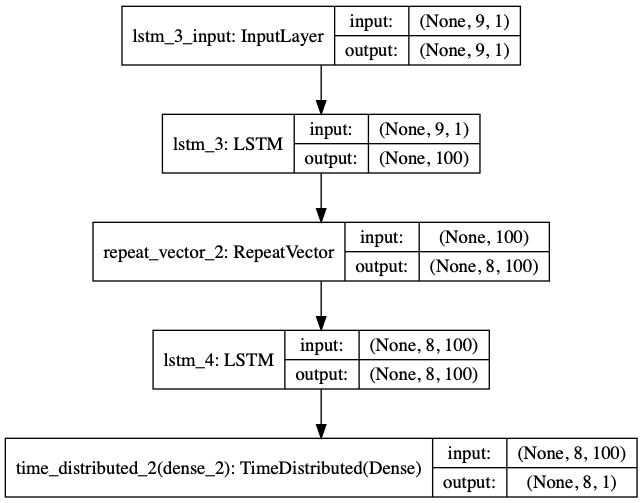

In [10]:
plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')